# <center>Лекція 4. Лінійні моделі класифікації і регресії</center>
## <center>Частина 1</center>

<a class="anchor" id="4-1"></a>

## Зміст 

- [4.1. Лінійна регресія](#4.1)
    + [4.1.1. Метод найменших квадратів](#4.1.1)
    + [4.1.2. Метод максимальної правдоподібності](#4.1.2)
    + [4.1.3. Розкладання помилки на зміщення і розкид (Bias-variance decomposition)](#4.1.3)
    + [4.1.4. Регуляризація лінійної регресії](#4.1.4)
    
- [4.2. Логістична регресія та метод максимальної правдоподібності](#4.2)
    + [4.2.1. Лінійний класифікатор](#4.2.1)
    + [4.2.2. Логістична регресія, як лінійний класифікатор](#4.2.2)
    + [4.2.3. Принцип максимальної правдоподібності та логістична регресія](#4.2.3)
    + [4.2.4. L2-регуляризація логістичної функції втрат](#4.2.4)

<a class="anchor" id="4.1"></a>

## <span style="color:blue; font-size:1.2em;">4.1. Лінійна регресія</span>

[Повернутися до змісту](#4-1)

<a class="anchor" id="4.1.1"></a>

### <span style="color:blue; font-size:1em;">4.1.1 Метод найменших квадратів</span>

[Повернутися до змісту](#4-1)

Розповідь про лінійні моделі ми почнемо з лінійної регресії. В першу чергу, необхідно задати модель залежності цільової змінної $y$ від чинників, що її пояснюють; функція залежності буде лінійною: $y = w_0 + \sum_{i=1}^m w_i x_i$. Якщо ми додамо фіктивну розмірність $x_0 = 1$ для кожного спостереження, тоді лінійну форму можна переписати більш компактно, записавши вільний член $w_0$ під суму: $y = \sum_{i=0}^m w_i x_i = \textbf{w}^{\text{T}} \textbf{x}$. Якщо розглядати матрицю спостереження-ознаки, у якій в рядках знаходяться приклади з набору даних, то нам необхідно додати одиничну колонку зліва. Задамо модель наступним чином:

$$\large \textbf y = \textbf{X} \textbf w + \epsilon,$$

де
- $\textbf{y} \in \mathbb{R}^n$ – цільова змінна;
- $\textbf{w}\in \mathbb{R}^{m+1}$ – вектор параметрів моделі (в машинному навчанні (МН) ці параметри часто називають вагами);
- $\textbf{X}$ – матриця спостережень й ознак розмірності $n$ рядків на $m + 1$ стовпців (включаючи фіктивну одиничну колонку зліва) з повним рангом за стовпцями: $\text{rank}\left(\textbf{X}\right) = m$;
- $\epsilon$ – випадкова змінна, що відповідає випадковій, непрогнозованій помилці моделі.

Можемо виписати вираз для кожного конкретного спостереження

$$\large 
y_i = \sum_{j=0}^m w_j X_{ij} + \epsilon_i$$

Також на модель накладаються такі обмеження (інакше це буде якась інша регресія, але точно не лінійна):
- математичне очікування випадкових помилок дорівнює нулю: $\forall i: \mathbb{E}\left[\epsilon_i\right] = 0$;
- дисперсія випадкових помилок однакова і кінцева, це властивість називається [гомоскедастичністю](https://uk.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96%D1%81%D1%82%D1%8C): $\forall i: \text{Var}\left(\epsilon_i\right) = \sigma^2 < \infty$;
- випадкові помилки не скорельовані: $\forall i \neq j: \text{Cov}\left(\epsilon_i, \epsilon_j\right) = 0$.

Оцінка $\widehat{w}_i$ ваг $w_i$ називається *лінійною*, якщо

$$\large \widehat{w}_i = \omega_{1i}y_1 + \omega_{2i}y_2 + \cdots + \omega_{1n}y_n,$$

де $\forall\ k\ \omega_{ki}$ залежить лише від спостережуваних даних $\textbf{X}$ і майже напевно нелінійно.

Оскільки розв'язком завдання пошуку оптимальних ваг буде саме лінійна оцінка, то і модель називається *лінійною регресією*.

Введемо ще одне визначення. Оцінка $\widehat{w}_i$ називається *незміщенною* тоді, коли мат. очікуванння оцінки дорівнює реальному, але невідомому значенню оцінюваного параметра:

$$\large \mathbb{E}\left[\widehat{w}_i\right] = w_i$$

Один із способів обчислити значення параметрів моделі є **метод найменших квадратів** (МНК), який мінімізує середньоквадратичну помилку між реальним значенням залежної змінної і прогнозом, що видане моделлю:

$$\large \begin{array}{rcl}\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf{X} \textbf{w}\right)^{\text{T}} \left(\textbf{y} - \textbf{X} \textbf{w}\right)
\end{array}$$

Для вирішення даної оптимізаційної задачі необхідно обчислити похідні за параметрами моделі, прирівняти їх до нуля і розв'язати отримані рівняння щодо $\textbf w$ (матричне диференціювання непідготовленому студентові може здатися складним, тому для кращого розуміння спробуйте розписати все через суми, щоби переконатися у відповіді):

Шпаргалка за матричними похідними:


$$\large \begin{array}{rcl} 
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} &=& \textbf{A} \\
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} \textbf{X} &=& \left(\textbf{A} + \textbf{A}^{\text{T}}\right)\textbf{X} \\
\frac{\partial}{\partial \textbf{A}} \textbf{X}^{\text{T}} \textbf{A} \textbf{y} &=&  \textbf{X}^{\text{T}} \textbf{y}\\
\frac{\partial}{\partial \textbf{X}} \textbf{A}^{-1} &=& -\textbf{A}^{-1} \frac{\partial \textbf{A}}{\partial \textbf{X}} \textbf{A}^{-1} 
\end{array}$$

Продовжимо:

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right)
\end{array}$$

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

Отже, маючи на увазі всі визначення та умови, що описані вище, можемо стверджувати, опираючись на [теорему Маркова-Гаусса](https://uk.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0), що оцінка МНК є найкращою оцінкою параметрів моделі, поміж усіх *лінійних* і *незміщених* оцінок, тобто має найменшу дисперсію.

<a class="anchor" id="4.1.2"></a>

### <span style="color:blue; font-size:1em;">4.1.2. Метод максимальної правдоподібності</span>

[Повернутися до змісту](#4-1)

У студентів цілком резонно могли виникнути запитання: наприклад, чому ми мінімізуємо середньоквадратичну помилку, а не щось інше. Адже можна мінімізувати середнє абсолютне значення нев'язки або ще щось. Єдине, що відбудеться в разі зміни значення, що мінімізується, так це те, що ми вийдемо з умов теореми Маркова-Гауса й наші оцінки перестануть бути кращими поміж лінійних і незміщених.

Давайте перед тим як продовжити, зробимо ліричний відступ, щоб проілюструвати метод максимальної правдоподібності на простому прикладі.

Чомусь випускники вітчизняних шкіл часто пам'ятають формулу етилового спирту. Давайте проведемо уявний експеримент: чи пам'ятають люди більш просту формулу метилового спирту: $CH_3OH$. Припустимо ми опитали 400 осіб і виявилося, що формулу пам'ятають всього 117 осіб. Розумно припустити, що ймовірність того, що наступний опитаний знає формулу метилового спирту – $\frac{117}{400} \approx 29\%$. Покажемо, що така інтуїтивно зрозуміла оцінка не просто хороша, а ще й є оцінкою максимальної правдоподібності.

Розберемося, звідки береться ця оцінка, а для цього згадаємо визначення [розподілу Бернуллі](https://uk.wikipedia.org/wiki/%D0%A0%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB_%D0%91%D0%B5%D1%80%D0%BD%D1%83%D0%BB%D0%BB%D1%96): випадкова величина $X$ має розподіл Бернуллі, якщо вона приймає лише два значення ($1$ і $0$ з вірогідністю $\theta$ і $1 - \theta$ відповідно) і має таку функцію розподілу ймовірності:

$$\large p\left(\theta, x\right) = \theta^x \left(1 - \theta\right)^\left(1 - x\right),~x \in \left\{0, 1\right\}$$

Здається цей розподіл – саме те, що нам потрібно, а параметр розподілу $\theta$ і є тією оцінкою ймовірності того, що людина знає формулу метилового спирту. Ми виконали $400$ *незалежних* експериментів; позначимо їхні результати як $\textbf{x} = \left(x_1, x_2, \ldots, x_{400}\right)$. Запишемо *правдоподібність* наших даних (спостережень), тобто ймовірність спостерігати 117 реалізацій випадкової величини $X = 1$ і 283 реалізації $X = 0$:

$$\large p(\textbf{x}; \theta) = \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = \theta^{117} \left(1 - \theta\right)^{283}$$

Далі будемо максимізувати цей вираз за $\theta$, і найчастіше це роблять не з правдоподібністю $p(\textbf{x}; \theta)$, а з його логарифмом (застосування монотонного перетворення не змінить рішення, але спростить обчислення):

$$\large \log p(\textbf{x}; \theta) = \log \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = $$
$$ \large = \log \theta^{117} \left(1 - \theta\right)^{283} =  117 \log \theta + 283 \log \left(1 - \theta\right)$$

Тепер ми хочемо знайти таке значення $\theta$, яке максимізує правдоподібність, для цього ми візьмемо похідну за $\theta$, прирівняємо до нуля і розв'яжемо отримане рівняння:

$$\large  \frac{\partial p(\textbf{x}; \theta)}{\partial \theta} = \frac{\partial}{\partial \theta} \left(117 \log \theta + 283 \log \left(1 - \theta\right)\right) = \frac{117}{\theta} - \frac{283}{1 - \theta};$$


$$\large \begin{array}{rcl} 
\frac{117}{\theta} - \frac{283}{1 - \theta} = 0 \Rightarrow \theta = \frac{117}{400}
\end{array}.$$

Виходить, що наша інтуїтивна оцінка - це і є оцінка максимальної правдоподібності. Застосуємо тепер ті ж міркування для задачі лінійної регресії та спробуємо з'ясувати, що лежить за середньоквадратичною помилкою. Для цього нам доведеться подивитися на лінійну регресію з ймовірнісної точки зору. Модель, природно, залишається такою ж:

$$\large \textbf y = \textbf X \textbf w + \epsilon,$$

але будемо тепер вважати, що випадкові помилки беруться з центрированного [нормального розподілу](https://uk.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB):

$$\large \epsilon_i \sim \mathcal{N}\left(0, \sigma^2\right)$$

Перепишемо модель в новому світлі:

$$\large \begin{array}{rcl} 
y_i &=& \sum_{j=0}^m w_j X_{ij} + \epsilon_i \\
&\sim& \sum_{j=0}^m w_j  X_{ij} + \mathcal{N}\left(0, \sigma^2\right) \\
p\left(\textbf{y} \mid \textbf X; \textbf{w}\right) &=& \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right)
\end{array}$$

Оскільки приклади беруться незалежно (помилки не скорельовані – одна з умов теореми Маркова-Гаусса), то повна правдоподібність даних матиме вигляд як добуток функцій щільності $p\left(y_i\right)$. Розглянемо логарифм правдоподібності, що дасть нам змогу перейти від добутку до суми:

$$\Large \begin{array}{rcl} 
\log p\left(\textbf{y} \mid \textbf X; \textbf{w}\right) &=& \log \prod_{i=1}^n \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right) \\
&=& \sum_{i=1}^n \log \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right) \\
&=& -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2
\end{array}$$

Ми хочемо знайти гіпотезу максимальної правдоподібності, тобто нам потрібно максимізувати вираз $p\left(\textbf{y} \mid \textbf X; \textbf{w}\right)$ за вектором $\textbf w$, отримавши водночас $\textbf{w}_{\text{ML}}$. Зверніть увагу, що під час максимізації функції за якомось параметром можна викинути всі члени, які не залежать від цього параметра:

$$\Large \begin{array}{rcl} 
\textbf{w}_{\text{ML}} &=& \arg \max_{\textbf w} p\left(\textbf{y}\mid \textbf X; \textbf{w}\right) = \arg \max_{\textbf w} \log p\left(\textbf{y}\mid \textbf X; \textbf{w}\right)\\
&=& \arg \max_{\textbf w} -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=& \arg \max_{\textbf w} -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=&  \arg \max_{\textbf w} \mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right)
\end{array}$$

Отже, ми побачили, що максимізація правдоподібності даних – це те ж саме, що і мінімізація середньоквадратичної помилки (за справедливості зазначених вище припущень). Виходить, що саме така функція вартості є наслідком того, що помилка розподілена нормально, а не якось по-іншому.

<a class="anchor" id="4.1.3"></a>

### <span style="color:blue; font-size:1em;">4.1.3. Розкладання помилки на зміщення і розкид (Bias-variance decomposition)</span>

[Повернутися до змісту](#4-1)

Тут поговоримо трохи про властивості оцінки, що отримана лінійною регресією. З попереднього пункту ми з'ясували, що
- істинне значення цільової змінної складається з деякої детермінованої функції $f(\textbf{x})$ та випадкової помилки $\epsilon$: $y = f\left(\textbf{x}\right) + \epsilon$;
- помилка розподілена нормально з центром в нулі і деяким розкидом: $\epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$;
- істинне значення цільової змінної теж розподілено нормально: $y \sim \mathcal{N}\left(f\left(\textbf{x}\right), \sigma^2\right)$
- ми намагаємося наблизити детерміновану, але невідому функцію $f\left(\textbf{x}\right)$ до лінійної функції від регресорів $\widehat{f}\left(\textbf{x}\right)$, яка, зокрема, є точковою оцінкою функції $f$ в просторі функцій (точніше, ми обмежили простір функцій параметричним сімейством лінійних функцій), тобто випадкової змінної, у якій є середнє значення і дисперсія.

Тоді помилка в точці $\textbf{x}$ розкладається в такий спосіб:

$$\large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\left(\widehat{f}\left(\textbf{x}\right)\right)^2\right] - 2\mathbb{E}\left[y\widehat{f}\left(\textbf{x}\right)\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\widehat{f}^2\right] - 2\mathbb{E}\left[y\widehat{f}\right] \\
\end{array}$$

Для наочності опустимо позначення аргументу функцій. Розглянемо кожен член окремо, перші два розписуються легко за формулою $\text{Var}\left(z\right) = \mathbb{E}\left[z^2\right] - \mathbb{E}\left[z\right]^2$:

$$\large \begin{array}{rcl} 
\mathbb{E}\left[y^2\right] &=& \text{Var}\left(y\right) + \mathbb{E}\left[y\right]^2 = \sigma^2 + f^2\\
\mathbb{E}\left[\widehat{f}^2\right] &=& \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 \\
\end{array}$$

Пояснення:

$$\large \begin{array}{rcl} 
\text{Var}\left(y\right) &=& \mathbb{E}\left[\left(y - \mathbb{E}\left[y\right]\right)^2\right] \\
&=& \mathbb{E}\left[\left(y - f\right)^2\right] \\
&=& \mathbb{E}\left[\left(f + \epsilon - f\right)^2\right] \\
&=& \mathbb{E}\left[\epsilon^2\right] = \sigma^2
\end{array}$$

$$\large \mathbb{E}[y] = \mathbb{E}[f + \epsilon] = \mathbb{E}[f] + \mathbb{E}[\epsilon] = f$$

І тепер останній член суми. Ми пам'ятаємо, що помилка і цільова змінна незалежні один від одного:

$$\large \begin{array}{rcl} 
\mathbb{E}\left[y\widehat{f}\right] &=& \mathbb{E}\left[\left(f + \epsilon\right)\widehat{f}\right] \\
&=& \mathbb{E}\left[f\widehat{f}\right] + \mathbb{E}\left[\epsilon\widehat{f}\right] \\
&=& f\mathbb{E}\left[\widehat{f}\right] + \mathbb{E}\left[\epsilon\right] \mathbb{E}\left[\widehat{f}\right]  = f\mathbb{E}\left[\widehat{f}\right]
\end{array}$$

Нарешті, збираємо все разом:

$$\large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 - 2f\mathbb{E}\left[\widehat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\widehat{f}\right]\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\widehat{f}\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2
\end{array}$$

Итак, мы достигли цели всех вычислений, описанных выше, последняя формула говорит нам, что ошибка прогноза любой модели вида $y = f\left(\textbf{x}\right) + \epsilon$ складывается из:

Врешті ми завершили обчислення, що описані вище. Остання формула показує, що помилка прогнозу будь-якої моделі виду $y = f\left(\textbf{x}\right) + \epsilon$ складається з:

- квадрата зміщення: $\text{Bias}\left(\widehat{f}\right)$ – середня помилка за усіма можливими наборами даних;
- дисперсії: $\text{Var}\left(\widehat{f}\right)$ – варіативність помилки, то, на скільки помилка буде відрізнятися, якщо навчати модель за різними наборами даних;
- неусовної помилки: $\sigma^2$.

Якщо з останньою частиною ми нічого зробити не можемо, то на перші два доданки ми можемо повпливати. В ідеалі звісно хотілося б звести нанівець обидва цих доданки (лівий верхній квадрат малюнка), але на практиці часто доводиться балансувати між зміщеними і нестабільними оцінками (висока дисперсія).

![img](https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/03_img/4_1_1_bvtf.png)

Як правило, у разі збільшення складності моделі (наприклад, під час збільшення кількості вільних параметрів) зменшується дисперсія (розкид) оцінки, але оцінка стає зміщеною. Через те, що навчальний набір даних повністю запам'ятовується замість узагальнення, невеликі зміни призводять до несподіваних результатів (наприклад, перенавчання). Якщо ж модель слабка, то вона не в змозі виявити закономірність; в результаті вивчається щось інше, зміщене щодо правильного рішення.

![img](https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/03_img/4_1_2_biasvariance.png)<br>

Теорема Маркова-Гаусса якраз стверджує, що МНК-оцінка параметрів лінійної моделі є найкращою в класі незміщених лінійних оцінок, тобто з найменшою дисперсією. Це означає, що у разі існування будь-якої іншої незміщенної моделі $g$ з класу лінійних моделей, то ми можемо бути впевнені, що
$Var\left(\widehat{f}\right) \leq Var\left(g\right)$.

<a class="anchor" id="4.1.4"></a>

### <span style="color:blue; font-size:1em;">4.1.4. Регуляризація лінійної регресії</span>

[Повернутися до змісту](#4-1)

Іноді трапляються ситуації, за яких ми навмисно збільшуємо зміщеність моделі для забезпечення її стабільності, тобто для зменшення дисперсії моделі $\text{Var}\left(\widehat{f}\right)$. Однією з умов теореми Маркова-Гаусса є повний стовпцевий ранг матриці $\textbf{X}$. В іншому випадку рішення МНК $\textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}$ не існує, тому що не існуватиме зворотна матриця $\left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1}$. Іншими словами, матриця $\textbf{X}^{\text{T}} \textbf{X}$ буде [виродженою](https://uk.wikipedia.org/wiki/%D0%92%D0%B8%D1%80%D0%BE%D0%B4%D0%B6%D0%B5%D0%BD%D0%B0_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D1%8F). Така задача називається [некоректно поставленою](https://uk.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D0%B5%D0%BA%D1%82%D0%BD%D0%BE_%D0%BF%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B0_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0). Задачу потрібно скорегувати, а саме, зробити матрицю $\textbf{X}^{\text{T}}\textbf{X}$ невиродженою, або регульованою (саме тому цей процес називається регуляризацією). Найчастіше в даних ми можемо спостерігати так звану [мультиколінеарність](https://uk.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D1%96%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D1%96%D1%81%D1%82%D1%8C) — коли два або кілька ознак сильно корельовані, в матриці $\textbf{X}$ це проявляється у вигляді "майже" лінійної залежності стовпців. Наприклад, в задачі прогнозування ціни квартири за її параметрами "майже" лінійна залежність буде в ознак "площа з урахуванням балкона" і "площа без урахування балкона". Формально для таких даних матриця $\textbf{X}^{\text{T}} \textbf{X}$ буде оберненою, але через мультиколінеарність у матриці $\textbf{X}^{\text{T}} \textbf{X}$ деякі власні значення будуть близькі до нуля, а в оберненій матриці $\left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1}$ з'являться екстремально великі власні значення, тому що власні значення оберненої матриці – це $\frac{1}{\lambda_i}$. Підсумком такого хитання власних значень стане нестабільна оцінка параметрів моделі, тобто додавання нового спостереження в набір навчальних даних призведе до зовсім іншого результату.

Ілюстрації зростання коефіцієнтів можна переглянути в [туторіалі](https://habr.com/ru/company/ods/blog/322076/). Одним із способів регуляризації є [регуляризація Тихонова](https://uk.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%8F_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0)#%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%A2%D0%B8%D1%85%D0%BE%D0%BD%D0%BE%D0%B2%D0%B0) (a.k.a. L2-регуляризація), яка в загальному вигляді виглядає як додавання нового члена до середньоквадратичної помилки: 

$$\Large \begin{array}{rcl} 
\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \left\|\Gamma \textbf{w}\right\|^2\\
\end{array}$$

Зачасту матриця Тихонова виражається як добуток деякого числа на одиничну матрицю: $\Gamma = \frac{\lambda}{2}  \textbf{E}$. У цьому випадку задача мінімізації середньоквадратичної помилки стає задачею з обмеженням на $L_2$ норму. Якщо продиференціювати нову функцію вартості за параметрами моделі, прирівняти отриману функцію до нуля і виразити $\textbf{w}$, то ми отримаємо точний розв'язок задачі.

$$\Large \begin{array}{rcl} 
\textbf{w} &=& \left(\textbf{X}^{\text{T}} \textbf{X} + \lambda \textbf{E}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

Така регресія має назву гребнева регресія (з англ. [ridge regression](https://en.wikipedia.org/wiki/Ridge_regression)). А гребенем є якраз діагональна матриця, яку ми додаємо до матриці $\textbf{X}^{\text{T}} \textbf{X}$, в результаті виходить гарантовано регулярна матриця.

![img](https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/03_img/4_1_3_ridge.png)<br>

Таке рішення зменшує дисперсію, але стає зміщеним, тому що мінімізується також і норма вектора параметрів, що змушує результат зміщуватися в бік нуля. На рисунку нижче на перетині білих пунктирних ліній знаходиться МНК-рішення. Блакитними точками позначені різні рішення гребеневої регресії. Бачимо, що за збільшення параметра регуляризації $\lambda$ кінцевий результат зміщується в бік нуля.

![img](https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/03_img/4_1_4_l2-regularization.png)<br>

Насамкінець, студентам пропонується звернутися до посту [Open Data Science](https://habrahabr.ru/company/ods/blog/322076/) на Хабрахабр за прикладом того, як $L_2$-регулярізація справляється з проблемою мультиколінеарності, а також щоб освіжити в пам'яті ще кілька інтерпретацій регуляризації.

<a class="anchor" id="4.2"></a>

## <span style="color:blue; font-size:1.2em;">4.2. Логістична регресія та метод максимальної правдоподібності</span>

[Повернутися до змісту](#4-1)

<a class="anchor" id="4.2.1"></a>

### <span style="color:blue; font-size:1em;">4.2.1. Лінійний класифікатор</span>

[Повернутися до змісту](#4-1)

Основна ідея лінійного класифікатора полягає в тому, що простір ознак може бути розділений гіперплощиною на дві півплощини, в кожній з яких прогнозується одне з двох значень цільового класу:

![img](https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/03_img/4_1_5_logit.png)<br>

Якщо це можна зробити без помилок, то навчальна вибірка називається *лінійно роздільною*.

Ми вже знайомі з лінійною регресією і методом найменших квадратів. Розглянемо тепер задачу бінарної класифікації, причому мітки цільового класу позначимо "+1" (позитивні приклади) і "-1" (негативні приклади).
Один з найпростіших лінійних класифікаторів на основі регресії має такий вигляд:

$$\Large a(\textbf{x}) = \text{sign}(\textbf{w}^{\text{T}}\textbf x),$$

де
 - $\textbf{x}$ – вектор ознак прикладу (разом з одиницею);
 - $\textbf{w}$ – ваги лінійної моделі (разом зі зміщенням $w_0$);
 - $\text{sign}(\bullet)$ – функція "сігнум", що повертає знак свого аргументу;
 - $a(\textbf{x})$ – відповідь класифікатора за прикладом $\textbf{x}$.

<a class="anchor" id="4.2.2"></a>

### <span style="color:blue; font-size:1em;">4.2.2. Логістична регресія, як лінійний класифікатор</span>

[Повернутися до змісту](#4-1)

Логістична регресія є окремим випадком лінійного класифікатора, але вона має гарне "вміння" – прогнозувати ймовірність $p_+$ віднесення прикладу $\textbf{x}_\text{i}$ до класу "+":

$$\Large p_+ = \text P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

Прогнозування не просто відповіді ("+1" або "-1"), а саме *ймовірності* віднесення до класу "+1" у багатьох задачах є надзвичайно важливою бізнес-вимогою. Наприклад, в задачі кредитного скорингу, де традиційно застосовується логістична регресія, часто прогнозують ймовірність неповернення кредиту ($p_+$). Клієнтів, які звернулися за кредитом, сортують за цією передбачуваною ймовірністю (за спадною), і отримують оціночну карту — де факто, рейтинг клієнтів від поганих до хороших. Нижче подамо іграшковий приклад такої оціночної карти.

![img](https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/03_img/4_1_6_toy_scorecard_eng.png)<br>

Банк вибирає для себе поріг $p_*$ передбаченої ймовірності неповернення кредиту (на рисунку – $0.15$) і починаючи з цього значення вже не видає кредит. Більш того, можна помножити передбачувану ймовірність на видану суму і отримати мат. очікування втрат від клієнта, що теж буде хорошою бізнес-метрикою.

Отже, ми хочемо прогнозувати ймовірність $p_+ \in [0,1]$, а поки вміємо будувати лінійний прогноз за допомогою МНК:

$$\Large b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}.$$

Яким чином перетворити отримане значення в ймовірність, межі якої – [0; 1]? Очевидно, для цього потрібна деяка функція $f: \mathbb{R} \rightarrow [0,1]$. У моделі логістичної регресії для цього береться конкретна функція: $\sigma(z) = \frac{1}{1 + \exp^{-z}}$.

Далі попрацюємо з кодом, щоби розібратися, які для цього є передумови.

In [1]:
# відключимо всякі попередження Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def sigma(z):
    return 1. / (1 + np.exp(-z))

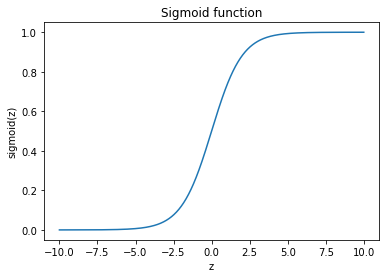

In [3]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx]);
plt.xlabel('z');
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid function');

Позначимо через $P(X)$ ймовірність події $X$. Тоді відношення ймовірностей $OR(X)$ визначається з $\frac{P(X)}{1-P(X)}$, а це — відношення ймовірностей того, відбудеться подія або ні. Очевидно, що ймовірність і відношення шансів містять однакову інформацію. Але в той час як $P(X)$ перебуває в межах від 0 до 1, $OR(X)$ є в межах від 0 до $\infty$.

Якщо обчислити логарифм $OR(X)$ (логарифм шансів, або логарифм відношення ймовірностей), то легко помітити, що $\log{OR(X)} \in \mathbb{R}$. Його то ми і будемо прогнозувати за допомогою МНК

Поглянемо, як логістична регресія робитиме прогноз $p_+ = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$ (поки вважаємо, що ваги $\textbf{w}$ ми якось отримали (тобто навчили модель), далі розберемося, як саме).

**Крок 1.** Обчислити значення $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}$. (рівняння $\textbf{w}^\text{T}\textbf{x} = 0$ задає гіперплощини, що розділяє приклади на 2 класи);


**Крок 2.** Обчислити логарифм відношення шансів: $ \log(OR_{+}) =  \textbf{w}^\text{T}\textbf{x}$.

**Крок 3.** Маючи прогноз шансів на віднесення до класу "+" – $OR_{+}$, обчислити $p_{+}$ за допомогою простої залежності:

$$\Large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} =  \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x})$$


У правій частині ми отримали якраз сигмоїд-функцію.

Отже, логістична регресія прогнозує ймовірність віднесення прикладу до класу "+" (за умови, що ми знаємо його ознаки і ваги моделі) як сигмоїд-перетворення лінійної комбінації вектора ваг моделі і вектора ознак прикладу:

$$\Large p_+(x_i) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}). $$

Наступне питання: як модель навчається. Тут ми знову звертаємося до принципу максимальної правдоподібності.

<a class="anchor" id="4.2.3"></a>

### <span style="color:blue; font-size:1em;">4.2.3. Принцип максимальної правдоподібності та логістична регресія</span>

[Повернутися до змісту](#4-1)

Тепер подивимося, як з принципу максимальної правдоподібності виходить оптимізаційна задача, яку вирішує логістична регресія, а саме, – мінімізація *логістичної* функції втрат.
Вище ми побачили, що логістична регресія моделює ймовірність віднесення прикладу до класу "+" як

$$\Large p_+(\textbf{x}_\text{i}) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Тоді для класу "-" аналогічна ймовірність:
$$\Large p_-(\textbf{x}_\text{i})  = \text{P}\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sigma(-\textbf{w}^\text{T}\textbf{x}_\text{i}) $$

Обидва цих вирази можна легко об'єднати в одне:

$$\Large \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Вираз $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ називається *відступом* (*margin*) класифікації на об'єкті $\textbf{x}_\text{i}$ (не плутати з зазором (теж margin), про який найчастіше говорять в контексті [методу опорних векторів](https://uk.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D0%B8%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D1%96%D0%B2)). Якщо він невід'ємний, то модель не помиляється на об'єкті$\textbf{x}_\text{i}$, якщо ж від'ємний – клас для $\textbf{x}_\text{i}$ спрогнозований неправильно.
Зауважимо, що відступ визначено для об'єктів саме навчальної вибірки, для яких відомі реальні мітки цільового класу $y_i$.

Щоб зрозуміти, чому ми зробили саме такі висновки, звернемося до геометричної інтерпретації лінійного класифікатора. Детально про це можна почитати в матеріалах Євгенія Соколова – [тут](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem09_linear.pdf). 

Для глибшого розуміння лінійної класифікації можна спробувати розв'язати майже класичну задачу з початкового курсу лінійної алгебри: знайти відстань від точки з радіус-вектором $\textbf{x}_A$ до площини, яка задається рівнянням $\textbf{w}^\text{T}\textbf{x} = 0.$

Відповідь:

$$\Large \rho(\textbf{x}_A, \textbf{w}^\text{T}\textbf{x} = 0) = \frac{\textbf{w}^\text{T}\textbf{x}_A}{||\textbf{w}||}$$

![img](https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/03_img/4_1_7_simple-linal-task.png)<br>

Коли отримаємо (або подивимося) відповідь, то зрозуміємо, що чим більший за модулем вираз $\textbf{w}^{\text{T}}\textbf{x}_\text{i}$, тим далі точка $\textbf{x}_\text{i}$ знаходиться від площини $\textbf{w}^{\text{T}}\textbf{x} = 0.$

Тому вираз $M(\textbf{x}_\text{i}) = y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}$ – це свого роду "впевненість" моделі в класифікації об'єкта $\textbf{x}_\text{i}$: 

- якщо відступ великий (за модулем) і додатний, це означає, що мітка класу поставлена правильно, а об'єкт знаходиться далеко від розділяючої гіперплощини (такий об'єкт класифікується впевнено). На рисунку – $x_3$.
- якщо відступ великий (за модулем) і від'ємний, то мітка класу поставлена неправильно, а об'єкт знаходиться далеко від розділяючої гіперплощини (швидше за все такий об'єкт – аномалія, наприклад, його мітка в навчальній вибірці поставлена неправильно). На рисунку – $x_1$.
- якщо відступ малий (за модулем), то об'єкт знаходиться близько до розділяючої гіперплощини, а знак відступу визначає, чи правильно об'єкт класифікований. На рисунку – $x_2$ та $x_4$.

![img](https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/03_img/4_1_8_margin.png)<br>

Тепер розпишемо правдоподібність вибірки, а саме, ймовірність спостерігати даний вектор $\textbf{y}$ у вибірці $\textbf X$. Робимо сильне припущення: об'єкти приходять незалежно, з одного розподілу (*i.i.d.*). Тоді

$$\Large \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \prod_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

де $\ell$ – довжина вибірки $\textbf X$ (кількість рядків).

Як положено, візьмемо логарифм цього виразу (суму оптимізувати значно простіше, ніж добуток):

$$\Large  \log \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \log \sum_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i})   = $$

$$\Large  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})$$

Тобто в даному випадку принцип максимізації правдоподібності призводить до мінімізації виразу

$$\Large \mathcal{L_{log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}).$$

Це *логістична* функція втрат, що просумована за усіма об'єктами навчальної вибірки.

Подивимося на нову функцію, як на функцію від відступу: $L(M) = \log (1 + \exp^{-M})$. Побудуємо її графік, а також графік 1/0 функції втрат (*zero-one loss*), яка просто штрафує модель на 1 за помилку на кожному об'єкті (відступ від'ємний): $L_{1/0}(M) = [M < 0]$.

![img](https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/03_img/4_1_9_logloss_margin_eng.png)<br>

Рисунок відображає загальну ідею, що в задачі класифікації, не вміючи безпосередньо мінімізувати кількість помилок (градієнтними методами цього не зробити – похідна 1/0 функції втрат в нулі прямує в безмежність), ми мінімізуємо деяку її верхню оцінку. В даному випадку це логістична функція втрат (де логарифм двійковий, але це не принципово), і справедливо

$$\Large \mathcal{L_{\text{1/0}}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} [M(\textbf{x}_\text{i}) < 0] \leq \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}), $$

де $\mathcal{L_{\text{1/0}}} (\textbf X, \textbf{y}, \textbf{w})$ – просто кількість помилок логістичної регресії з вагами $\textbf{w}$ за вибіркою $(\textbf X, \textbf{y})$.

Тобто зменшуючи верхню оцінку $\mathcal{L_{\log}}$ на кількість помилок класифікації, ми у такий спосіб сподіваємося зменшити і саму кількість помилок.

<a class="anchor" id="4.2.4"></a>

### <span style="color:blue; font-size:1em;">4.2.4. L2-регуляризація логістичної функції втрат</span>

[Повернутися до змісту](#4-1)

$L2-регуляризація$ логістичної регресії влаштована майже так само, як і гребенева (ridge regression). Замість функціонала $\mathcal{L_{\log}} (X, \textbf{y}, \textbf{w})$ мінімізується наступний:

$$\Large J(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

У разі логістичної регресії прийнято введення зворотного коефіцієнта регуляризації $C = \frac{1}{\lambda}$. І тоді рішенням задачі буде

$$\Large \widehat{\textbf{w}}  = \arg \min_{\textbf{w}} J(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 

Далі розглянемо приклад, що дає змогу інтуїтивно зрозуміти один з сенсів регуляризації. 